<a href="https://colab.research.google.com/github/Tanishk2610/Sentiment_Classifier_Pipeline/blob/main/Sentiment_Classifier_Pipeline_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers==4.43.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 30.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requ

In [3]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [5]:
df = pd.read_parquet("/content/Training_data.parquet")

In [6]:
df.head()

,sentiment,comment
0,"negative,angry",हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...
1,"negative,angry",हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...
2,"negative,angry",*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...
3,"negative,angry",*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...
4,"negative,angry",मत कोणाला द्यायचे हे समजत नसेल तर*\n● अभिनंदनच...


# Data Pre-processing

In [7]:
df.shape

(38395, 2)

In [8]:
df['count'] = df['comment'].astype(str).apply(lambda x: len(x.split()))

In [9]:
df.head()

,sentiment,comment,count
0,"negative,angry",हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,366
1,"negative,angry",हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,366
2,"negative,angry",*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,375
3,"negative,angry",*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,375
4,"negative,angry",मत कोणाला द्यायचे हे समजत नसेल तर*\n● अभिनंदनच...,336


In [10]:
sentiment_count = df['sentiment'].value_counts()

sentiments = sentiment_count.index

sentiments

Index(['positive', 'negative,angry', 'negative', 'neutral', 'angry'], dtype='object', name='sentiment')

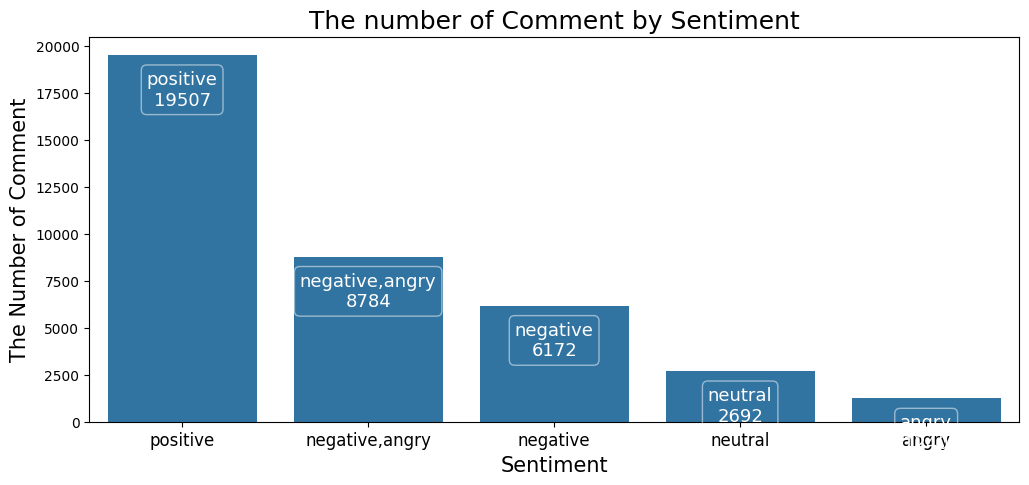

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = sentiment_count.index, y = sentiment_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{sentiments[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Sentiment', size = 15)

plt.ylabel('The Number of Comment', size= 15)

plt.xticks(size = 12)

plt.title("The number of Comment by Sentiment" , size = 18)

plt.show()

In [12]:
df['sentiment'].unique()

array(['negative,angry', 'negative', 'angry', 'neutral', 'positive'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label'] = le.fit_transform(df['sentiment'])

df.head(10)

,sentiment,comment,count,label
0,"negative,angry",हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,366,2
1,"negative,angry",हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,366,2
2,"negative,angry",*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,375,2
3,"negative,angry",*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,375,2
4,"negative,angry",मत कोणाला द्यायचे हे समजत नसेल तर*\n● अभिनंदनच...,336,2
5,"negative,angry",मत कोणाला द्यायचे हे समजत नसेल तर*\n● अभिनंदनच...,336,2
6,"negative,angry",@yakubmomin1995 पहिले राजे छत्रपती शिवाजी महार...,316,2
7,"negative,angry",@yakubmomin1995 पहिले राजे छत्रपती शिवाजी महार...,316,2
8,"negative,angry",अरे माने दादा महाराष्ट्र कधी दिल्ली समोर झुकत ...,248,2
9,"negative,angry",अरे माने दादा महाराष्ट्र कधी दिल्ली समोर झुकत ...,248,2


In [14]:
df['label'].value_counts()

,count
label,
4,19507
2,8784
1,6172
3,2692
0,1240


In [15]:
df = df.drop(columns=['sentiment', 'count'], axis=1)
df.head()

,comment,label
0,हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,2
1,हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,2
2,*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,2
3,*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,2
4,मत कोणाला द्यायचे हे समजत नसेल तर*\n● अभिनंदनच...,2


In [16]:
id2label = {
    0: 'angry',
    1: 'negative',
    2: 'negative,angry',
    3: 'neutral',
    4: 'positive'
}

In [17]:
label2id = {v: k for k, v in id2label.items()}

print("id2label:", id2label)
print("label2id:", label2id)

id2label: {0: 'angry', 1: 'negative', 2: 'negative,angry', 3: 'neutral', 4: 'positive'}
label2id: {'angry': 0, 'negative': 1, 'negative,angry': 2, 'neutral': 3, 'positive': 4}


In [18]:
data_distribution = df['label'].value_counts(normalize=True).sort_index()

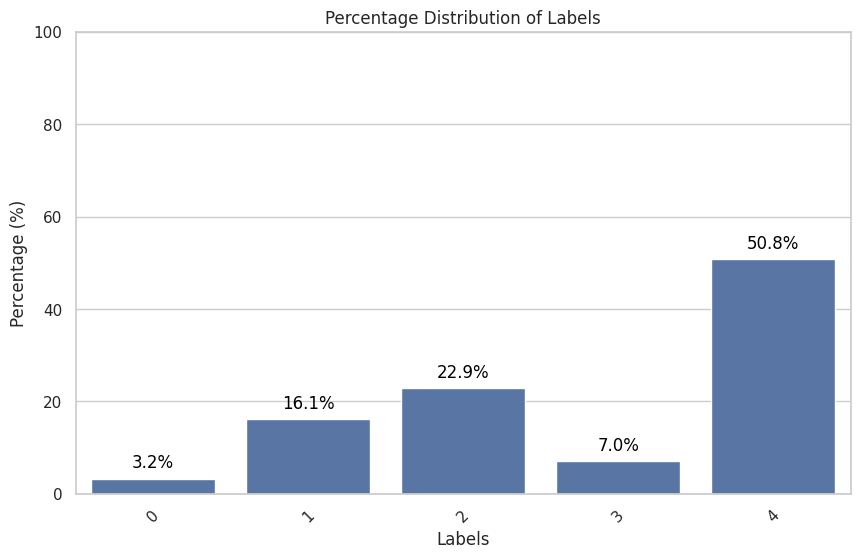

In [19]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=data_distribution.index, y=data_distribution.values * 100)  # Multiply by 100 for percentage

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Labels')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate the bars with percentage values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),  # Adjust the position of the text
                      textcoords='offset points')

# Show the plot
plt.show()

In [20]:
df.head()

,comment,label
0,हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,2
1,हे बघा माझ्या मतदान दादांनो भगिनींनो तुम्ही आ...,2
2,*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,2
3,*संपत चालली देशभक्ती वाढत चालले राजकारण*😔\n सध...,2
4,मत कोणाला द्यायचे हे समजत नसेल तर*\n● अभिनंदनच...,2


# Data Splitting

In [21]:
# Split the data into train and test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['comment'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42
)

# Model Creation

In [22]:
model_ckpt = 'l3cube-pune/marathi-roberta'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Tokenize the data with explicit max_length
train_encodings = tokenizer(
    train_texts,
    # padding=True,
    padding='longest',
    truncation=True,
    # max_length=514,
    max_length=256,
    return_tensors='pt'
)

val_encodings = tokenizer(
    val_texts,
    # padding=True,
    padding='longest',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [23]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).clone().detach()
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets for training and evaluation
train_dataset = SentimentDataset(train_encodings, train_labels)
eval_dataset = SentimentDataset(val_encodings, val_labels)

In [24]:
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=5)

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/marathi-roberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    gradient_accumulation_steps=1,
    evaluation_strategy="steps",
    eval_steps=500,
    learning_rate=2e-5,
    logging_dir='./logs',
    logging_steps=100
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [27]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

In [28]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,0.968000,0.939071,0.671832,0.613156,0.602798,0.671832
1000,0.827700,0.797868,0.708686,0.688638,0.692028,0.708686
1500,0.775600,0.755468,0.730955,0.716395,0.715949,0.730955
2000,0.626900,0.719769,0.741503,0.736832,0.733544,0.741503
2500,0.594900,0.700664,0.759604,0.742058,0.745818,0.759604
3000,0.619600,0.643978,0.777575,0.768051,0.768411,0.777575
3500,0.554400,0.640742,0.788514,0.783685,0.782501,0.788514
4000,0.395200,0.660724,0.794114,0.788519,0.788733,0.794114
4500,0.440300,0.658370,0.798802,0.797143,0.797992,0.798802
5000,0.398800,0.623596,0.805704,0.804263,0.803362,0.805704


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
500,0.968000,0.939071,0.671832,0.613156,0.602798,0.671832
1000,0.827700,0.797868,0.708686,0.688638,0.692028,0.708686
1500,0.775600,0.755468,0.730955,0.716395,0.715949,0.730955
2000,0.626900,0.719769,0.741503,0.736832,0.733544,0.741503
2500,0.594900,0.700664,0.759604,0.742058,0.745818,0.759604
3000,0.619600,0.643978,0.777575,0.768051,0.768411,0.777575
3500,0.554400,0.640742,0.788514,0.783685,0.782501,0.788514
4000,0.395200,0.660724,0.794114,0.788519,0.788733,0.794114
4500,0.440300,0.658370,0.798802,0.797143,0.797992,0.798802
5000,0.398800,0.623596,0.805704,0.804263,0.803362,0.805704


TrainOutput(global_step=5760, training_loss=0.6338592211405436, metrics={'train_runtime': 6163.7974, 'train_samples_per_second': 14.95, 'train_steps_per_second': 0.934, 'total_flos': 1.2122905295886336e+16, 'train_loss': 0.6338592211405436, 'epoch': 3.0})

# Validation Loss

In [29]:
eval_result = trainer.evaluate()
print(f"Evaluation Results: {eval_result}")

Evaluation Results: {'eval_loss': 0.6186425685882568, 'eval_accuracy': 0.8077874723271259, 'eval_f1': 0.8062593001533307, 'eval_precision': 0.806054606634077, 'eval_recall': 0.8077874723271259, 'eval_runtime': 98.5072, 'eval_samples_per_second': 77.954, 'eval_steps_per_second': 4.873, 'epoch': 3.0}


In [30]:
val_loss = eval_result['eval_loss']
print(f"Validation Loss: {val_loss}")

Validation Loss: 0.6186425685882568


# Learning Curve

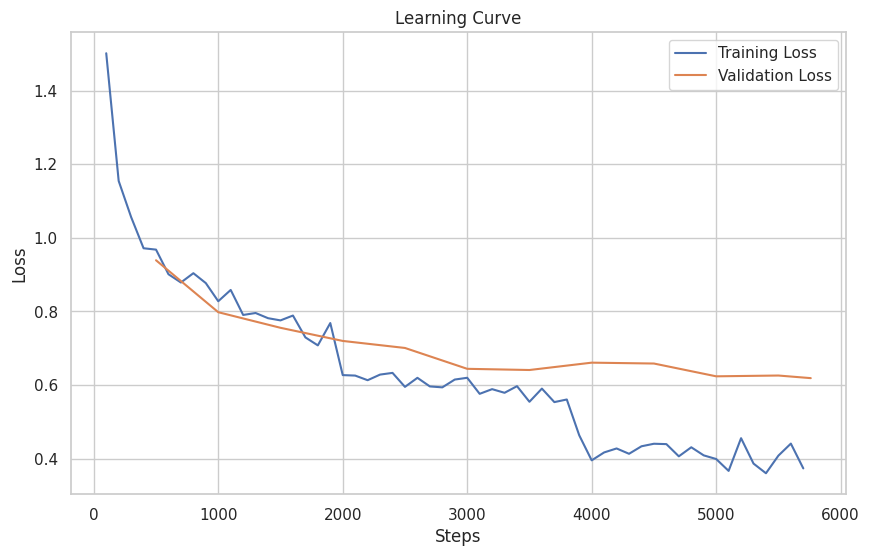

In [31]:
train_loss = trainer.state.log_history
plt.figure(figsize=(10, 6))
plt.plot([x['step'] for x in train_loss if 'loss' in x], [x['loss'] for x in train_loss if 'loss' in x], label='Training Loss')
plt.plot([x['step'] for x in train_loss if 'eval_loss' in x], [x['eval_loss'] for x in train_loss if 'eval_loss' in x], label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.savefig('learning_curve.png')

# Confusion Matrix

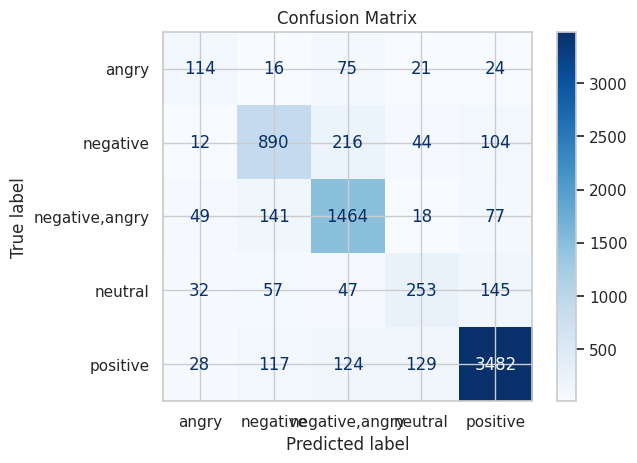

In [57]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


def get_predictions_and_labels(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in dataloader:
            inputs = {k: v.to(device) for k, v in batch.items() if k != 'labels'}
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

val_loader = DataLoader(eval_dataset, batch_size=16, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


predictions, true_labels = get_predictions_and_labels(model, val_loader, device)

cm = confusion_matrix(true_labels, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(id2label.values()))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Creating Sentiment Classifier Pipeline

In [70]:
from transformers import pipeline
import langid

id2label = {
    0: 'angry',
    1: 'negative',
    2: 'negative,angry',
    3: 'neutral',
    4: 'positive'
}

# Define the label2id mapping
label2id = {v: k for k, v in id2label.items()}

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to detect if text is in Marathi
def is_marathi(text):
    lang, _ = langid.classify(text)
    return lang == 'mr'

def analyze_sentiment():
    try:
        # Allow the user to input text for sentiment analysis
        user_input = input("Enter text for sentiment analysis: ")

        # Ensure the user has provided input
        if not user_input.strip():
            print("No input provided. Please enter some text for analysis.")
            return

        # Check if the text is in Marathi
        if not is_marathi(user_input):
            print("Text is not in Marathi.")
            return

        # Perform sentiment analysis
        sentiment = sentiment_pipeline(user_input)[0]

        # Extracting the label from the model's predictions
        label_index = int(sentiment['label'].split('_')[1])
        original_label = id2label.get(label_index)

        # Output the sentiment label and score
        print(f"Sentiment: {original_label}, Score: {sentiment['score']:.2f}")

    except Exception as e:
        print(f"An error occurred during sentiment analysis: {e}")

# Call the function to start the sentiment analysis
analyze_sentiment()

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Enter text for sentiment analysis: तो दिवस वाईट होता.
Sentiment: negative,angry, Score: 0.95


In [66]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
import torch

model_name_or_path = 'l3cube-pune/marathi-roberta'

pytorch_model = AutoModelForSequenceClassification.from_pretrained(model_name_or_path)

tf_model = TFAutoModelForSequenceClassification.from_pretrained(model_name_or_path, from_pt=True)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at l3cube-pune/marathi-roberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFXLMRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFXLMRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it 

In [71]:
# Save the TensorFlow model in H5 format
tf_model.save_pretrained('C:/Users/HP/OneDrive/Documents/Desktop/Internshpis Works/Ungray_Internship')

# Save the TensorFlow model in the SavedModel format
tf_model.save('C:/Users/HP/OneDrive/Documents/Desktop/Internshpis Works/Ungray_Internship', save_format="tf")